<a href="https://colab.research.google.com/github/NASSCOM-Capgemini-Hackathon/Colab-Files/blob/main/eda_only_AQI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [ ]:
sheets_name = {'Adilabad' : 0 , 
               'Nizamabad' : 1,
               'Khammam' : 2,
               'Warangal' : 3,
               'Karimnagar' : 4}

Adilabad
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   DATE    84 non-null     datetime64[ns]
 1   AQI     71 non-null     float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 1.4 KB


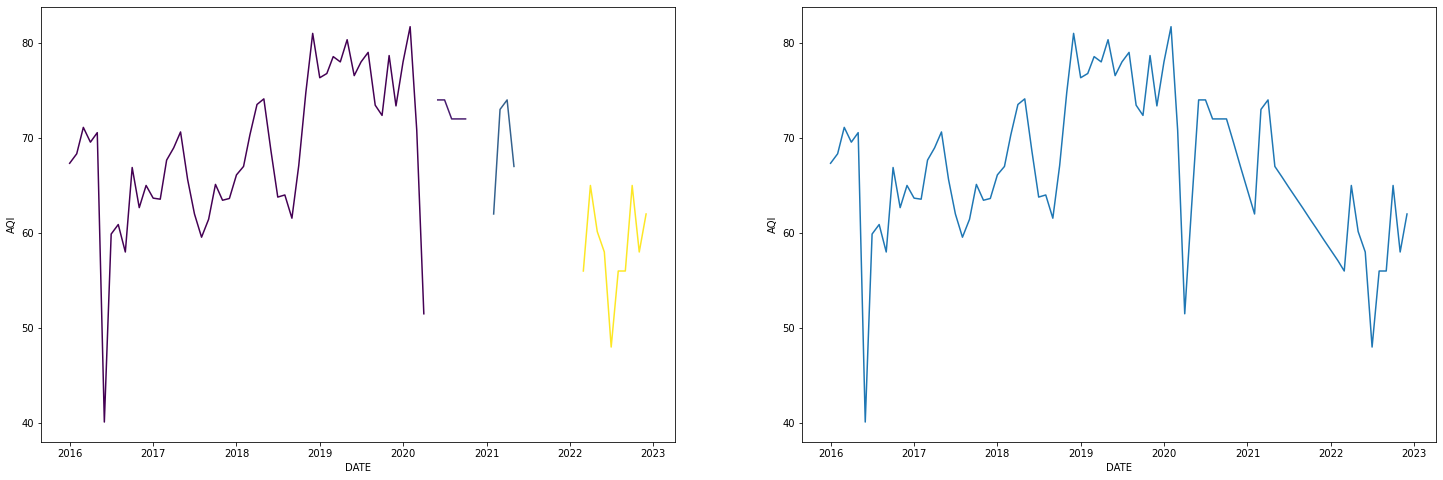

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   DATE    84 non-null     datetime64[ns]
 1   AQI     84 non-null     float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 1.4 KB
Nizamabad
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   DATE    84 non-null     datetime64[ns]
 1   AQI     83 non-null     float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 1.4 KB


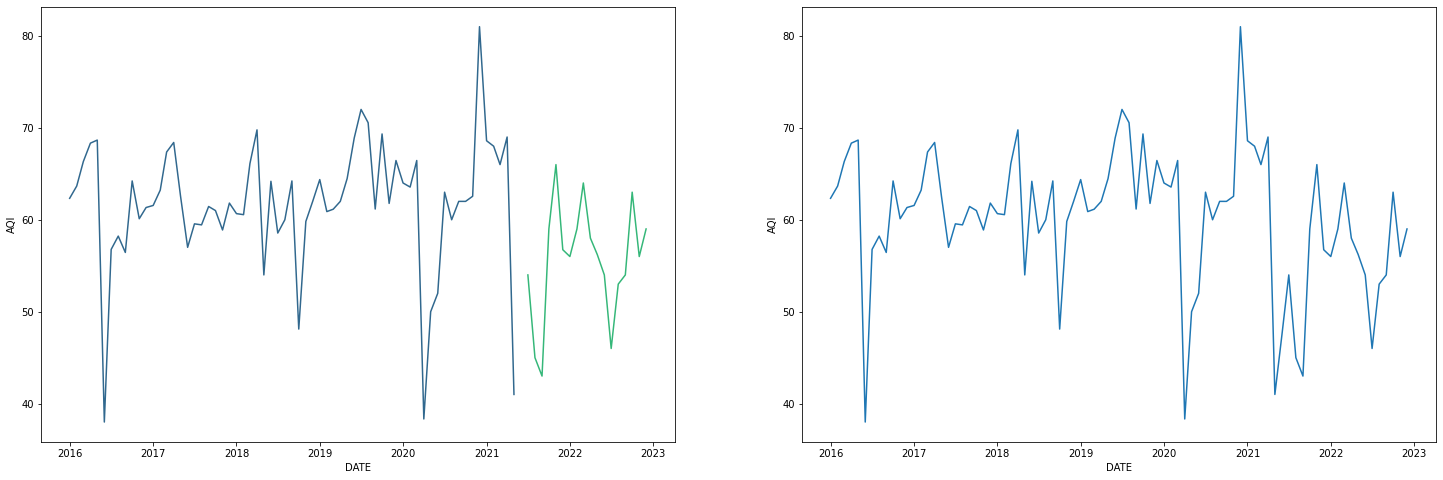

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   DATE    84 non-null     datetime64[ns]
 1   AQI     84 non-null     float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 1.4 KB
Khammam
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   DATE    84 non-null     datetime64[ns]
 1   AQI     83 non-null     float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 1.4 KB


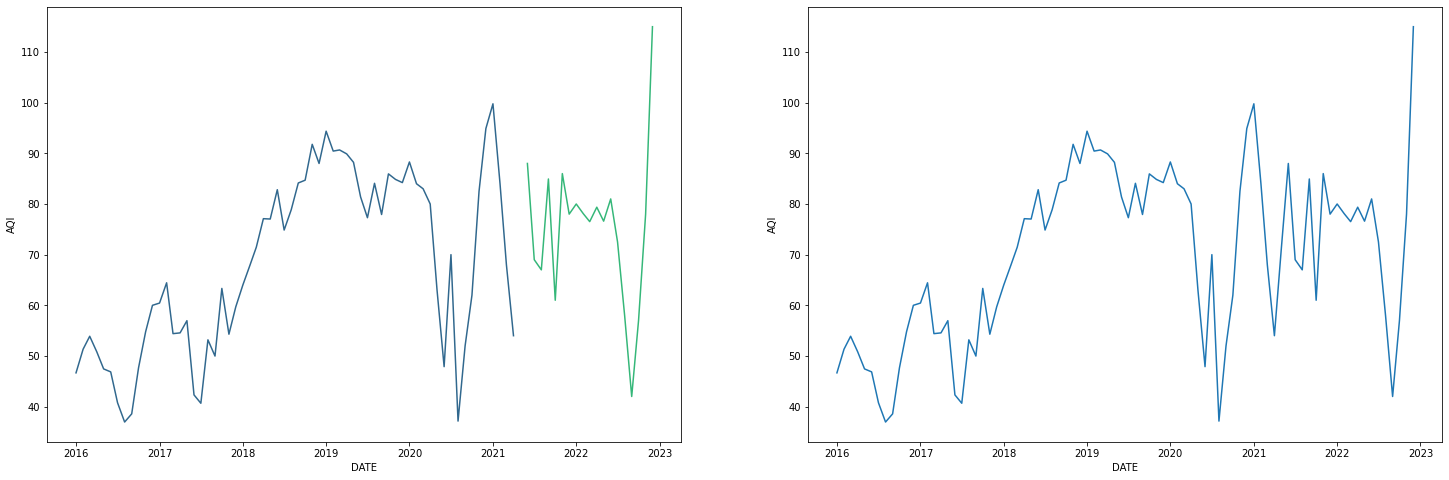

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   DATE    84 non-null     datetime64[ns]
 1   AQI     84 non-null     float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 1.4 KB
Warangal
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   DATE    84 non-null     datetime64[ns]
 1   AQI     84 non-null     float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 1.4 KB


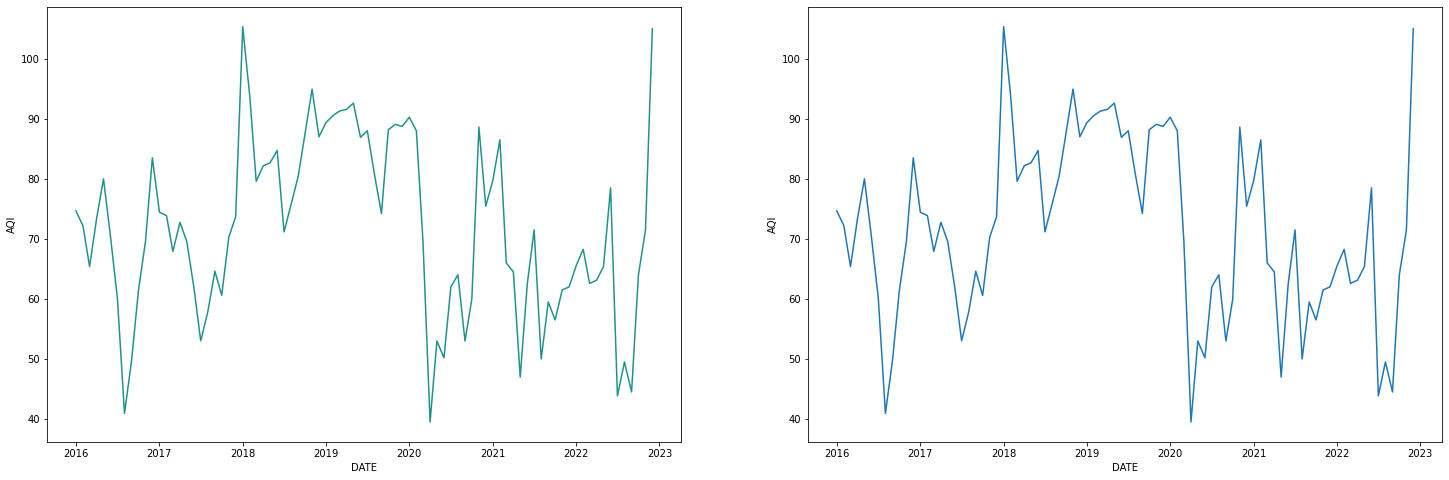

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   DATE    84 non-null     datetime64[ns]
 1   AQI     84 non-null     float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 1.4 KB
Karimnagar
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   DATE    84 non-null     datetime64[ns]
 1   AQI     84 non-null     float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 1.4 KB


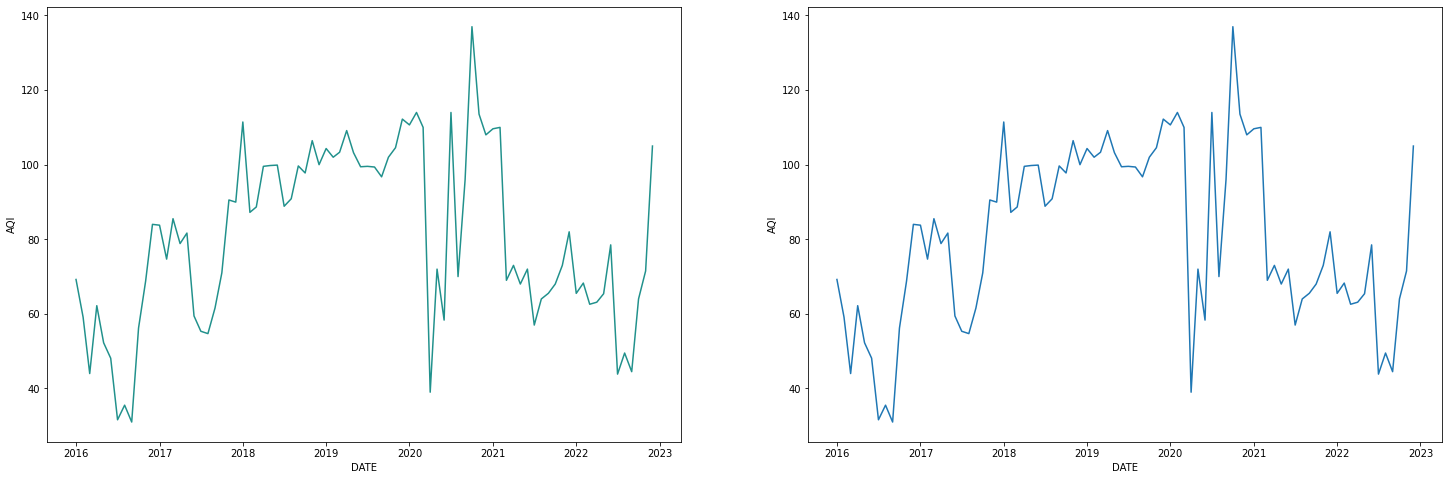

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   DATE    84 non-null     datetime64[ns]
 1   AQI     84 non-null     float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 1.4 KB


In [ ]:
for sheet in sheets_name:
  print(sheet)
  df = pd.read_excel('/content/Copy of AQI-full.xlsx',sheet_name=sheets_name[sheet])
  df.replace('-', np.nan, inplace=True)
  df.info()
  df["AQI"] = df["AQI"].astype("float64")
  for col in df.columns[1:]:
    fig, (ax1, ax2) = plt.subplots(1,2, figsize=(25,8))
    sns.lineplot(ax=ax1
      , data=df, x="DATE", y=col
      , hue=df[col].isna().cumsum()
      , palette='viridis'
      , legend=False, markers=True)
    df[col].interpolate(method='from_derivatives', order=5 ,limit_area='inside',limit_direction='both',inplace=True)
    sns.lineplot(ax=ax2
      , data=df, x="DATE", y=col)
    plt.show()
    df[col].replace(np.nan,round(df[col].mean(),2),inplace=True)
  df.info()
  df.to_csv('{}-aqi-interpolated.csv'.format(sheet),header=True)
  


In [ ]:
df = pd.read_excel('/content/Copy of AQI-full.xlsx',sheet_name=sheets_name['Adilabad'])
df.head()

,DATE,AQI
0,2016-01-01,67.333333
1,2016-02-01,68.333333
2,2016-03-01,71.111111
3,2016-04-01,69.555556
4,2016-05-01,70.555556


In [ ]:
# df['DATE'] = df.DATE.dt.tz_localize('UTC').dt.tz_convert('Asia/Kolkata')

In [ ]:
df.tail()

,DATE,AQI
79,2022-08-01,56.0
80,2022-09-01,56.0
81,2022-10-01,65.0
82,2022-11-01,58.0
83,2022-12-01,62.0


In [ ]:
df.replace('-', np.nan, inplace=True)

In [ ]:
df["AQI"] = df["AQI"].astype("float64")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   DATE    84 non-null     datetime64[ns]
 1   AQI     71 non-null     float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 1.4 KB


In [ ]:
df.shape

(84, 2)

**Filling the missing value**

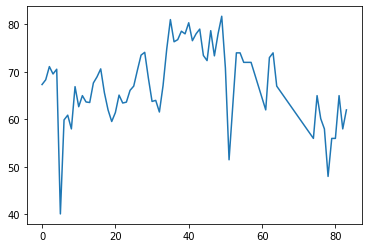

In [ ]:
for col in df.columns[1:]:
  # fig, (ax1, ax2) = plt.subplots(1,2, figsize=(25,8))
  # sns.lineplot(ax=ax1
  #   , data=df, x="DATE", y=col
  #   , hue=df[col].isna().cumsum()
  #   , palette='viridis'
  #   , legend=False, markers=True)
  df[col].interpolate(method='from_derivatives', order=3 ,limit_direction='both').plot()
  # sns.lineplot(x=df['DATE'],y=df[col].interpolate(method='akima', order=5 ,limit_direction='both') , ax=ax2)
  # plt.show()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   DATE    84 non-null     datetime64[ns]
 1   SO2     79 non-null     float64       
 2   NO2     79 non-null     float64       
 3   PM10    84 non-null     float64       
 4   PM2.5   80 non-null     float64       
 5   NH3     79 non-null     float64       
 6   AQI     84 non-null     float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 4.7 KB


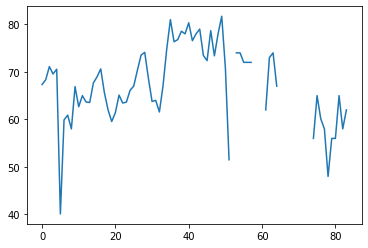

In [ ]:
df["AQI"].plot()

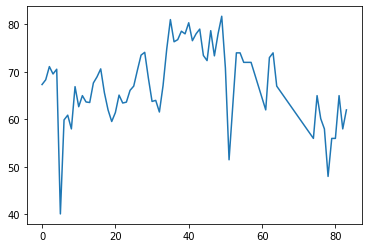

In [ ]:
df["AQI"].interpolate(method='from_derivatives', order=5 ,limit_direction='both').plot()  # interpolate